In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
import numpy as np
from skpsl.preprocessing import MinEntropyBinarizer
from skpsl.estimators import MulticlassScoringList
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv("data/InverseIncome.csv")
df = pd.read_csv("data/player_processed.csv")
X = df.iloc[:,1:]
y = df.iloc[:,0]
#X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
bacc = make_scorer(balanced_accuracy_score,adjusted=True)
pipe = make_pipeline(MinEntropyBinarizer(), LogisticRegression(max_iter=10000, multi_class="multinomial"))
#pipe = LogisticRegression(C=10,max_iter=10000, multi_class="multinomial")
cross_validate(pipe,X,y, scoring=dict(bacc=bacc))["test_bacc"].mean()

/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this war

0.6956681622872947

In [4]:
cross_val_score(
    MulticlassScoringList(
        score_set=set(range(-8,10))-{0},
        cascade_loss=max),
    X, y).mean()

0.7623866392340318

In [5]:
cross_val_score(
    MulticlassScoringList(
        score_set=set(range(-8,10))-{0},
        ga_params=dict(), cascade_loss=max),
    X, y, n_jobs=-1).mean()

/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecate

0.6324888985950352

/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


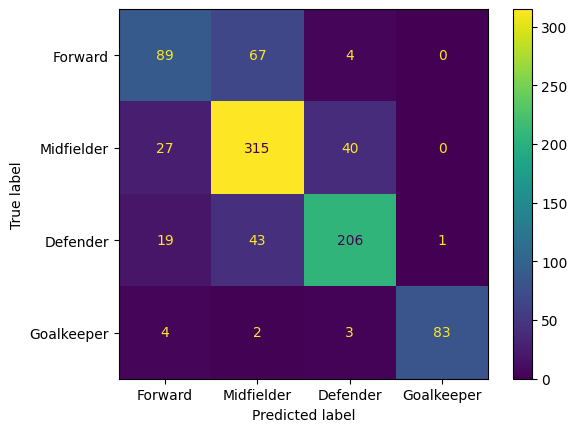

In [6]:
lr = make_pipeline(MinEntropyBinarizer(), LogisticRegression(C=10,max_iter=10000, multi_class="multinomial")).fit(X_train,y_train)
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test,labels=["Forward", "Midfielder", "Defender", "Goalkeeper"])

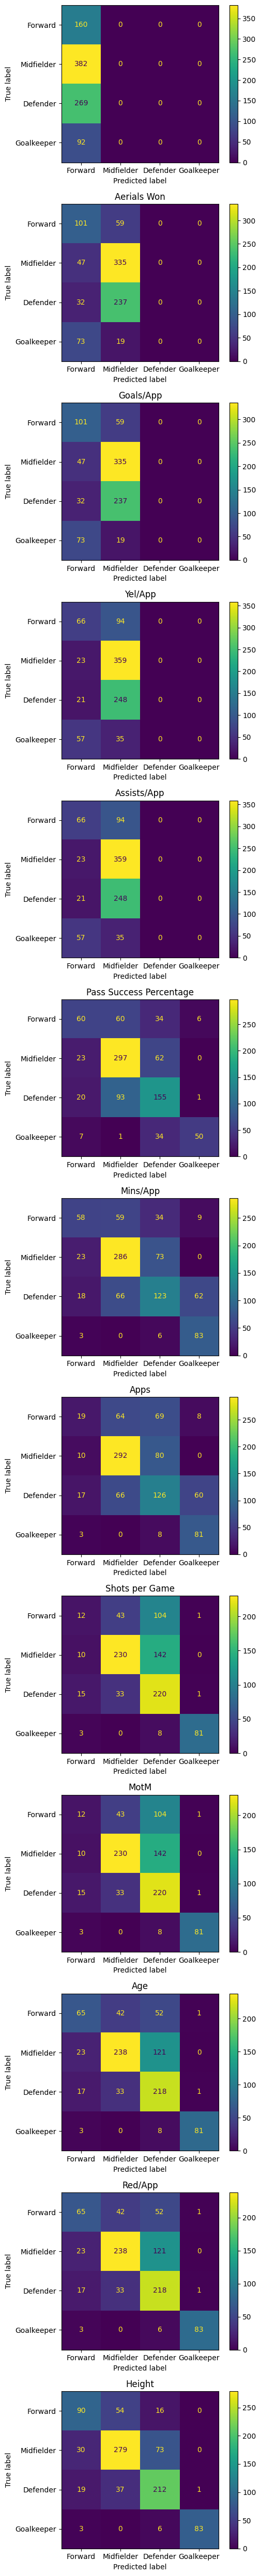

In [7]:
clf = MulticlassScoringList(score_set=set(range(-8,10))-{0}).fit(X_train,y_train)
#ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)


fig, ax = plt.subplots(len(clf)+1, figsize=(5,50))
for i in range(len(clf)+1):
    ConfusionMatrixDisplay.from_predictions(y_test, clf[i].predict(X_test), ax=ax[i], labels=["Forward", "Midfielder", "Defender", "Goalkeeper"])
    if i > 0:
        ax[i].set_title(X.columns[clf.f_ranks[i-1]])
plt.tight_layout()

In [8]:
clf.inspect(X.columns)

,Feature,Thresholds,Defender,Forward,Goalkeeper,Midfielder
0,,NaN,1,3,-6,1
1,Aerials Won,0.850000,5,3,-7,-1
2,Goals/App,0.079596,-2,3,-2,1
3,Yel/App,0.101572,1,-1,-2,2
4,Assists/App,0.038925,1,1,-3,2
5,Pass Success Percentage,73.050000,2,-2,-3,3
6,Mins/App,80.027652,1,-6,9,-4
7,Apps,15.500000,1,-1,-1,1
8,Shots per Game,0.650000,-2,3,-4,3
9,MotM,0.500000,-1,-2,3,-1


/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


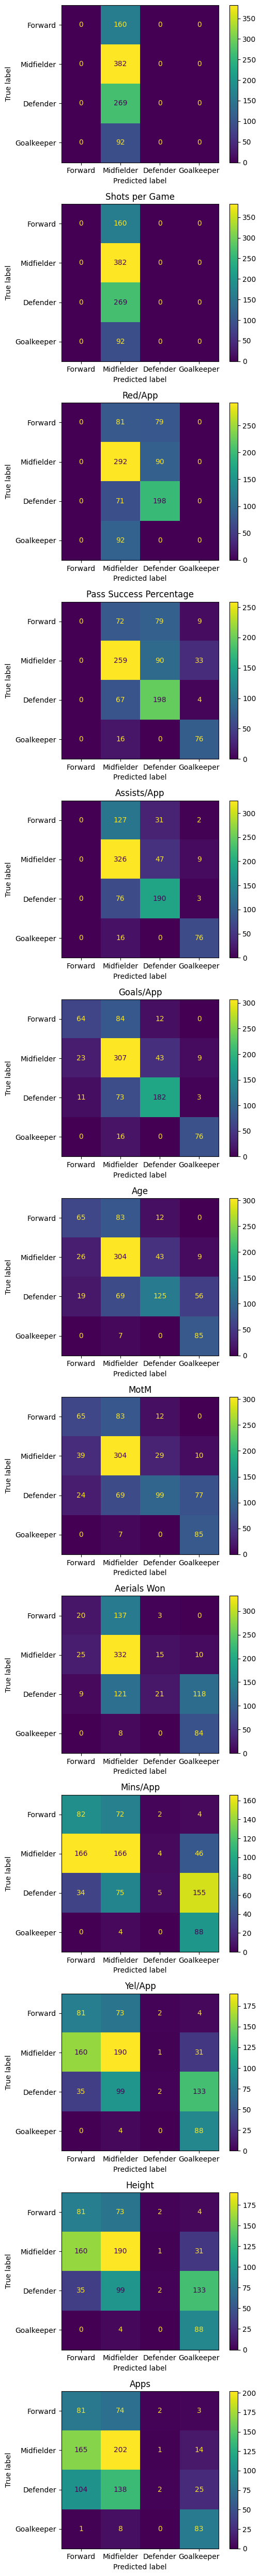

In [15]:
clf = MulticlassScoringList(score_set=set(range(-3,4)), ga_params=dict(maxiter=5000,init_pop_noise=0.2)).fit(X_train,y_train)
#ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test)


fig, ax = plt.subplots(len(clf)+1, figsize=(5,50))
for i in range(len(clf)+1):
    ConfusionMatrixDisplay.from_predictions(y_test, clf[i].predict(X_test), ax=ax[i], labels=["Forward", "Midfielder", "Defender", "Goalkeeper"])
    if i > 0:
        ax[i].set_title(X.columns[clf.f_ranks[i-1]])
plt.tight_layout()

In [ ]:
clf.inspect(X.columns)

,Feature,Thresholds,Defender,Forward,Goalkeeper,Midfielder
0,,NaN,-2,-2,-2,1
1,Pass Success Percentage,73.050000,1,-2,-2,-2
2,Shots per Game,0.650000,-1,1,-2,2
3,Aerials Won,0.850000,2,1,-3,-3
4,Red/App,0.007005,1,1,1,1
5,Age,23.500000,-1,-3,-3,-1
6,Apps,15.500000,-1,-2,1,2
7,Goals/App,0.079596,-1,2,-2,1
8,Yel/App,0.101572,2,1,-1,1
9,Assists/App,0.038925,-3,-2,-3,-1


/home/sheid/.cache/pypoetry/virtualenvs/scikit-psl-VP3OoPiz-py3.12/lib/python3.12/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


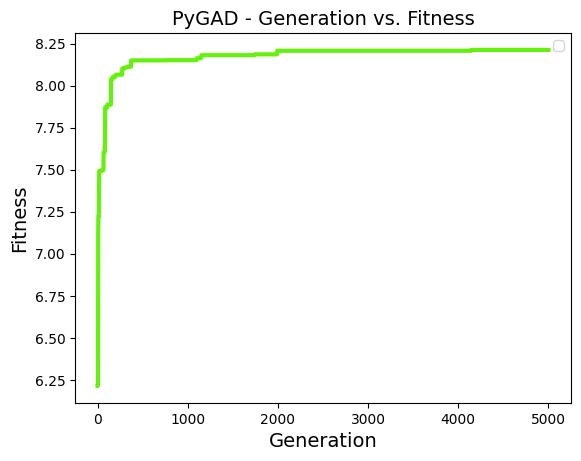

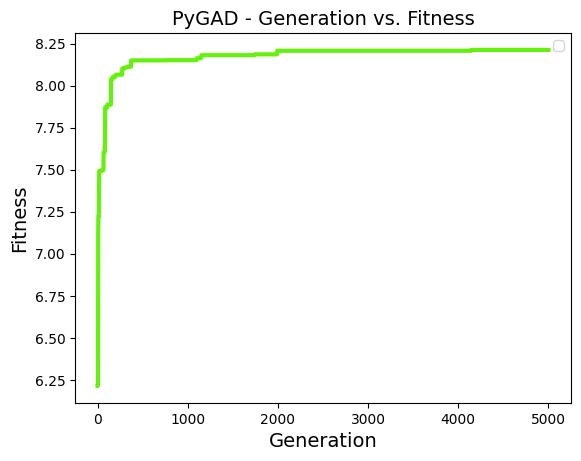

In [ ]:
clf.ga_instance.plot_fitness()

6.985603543743078

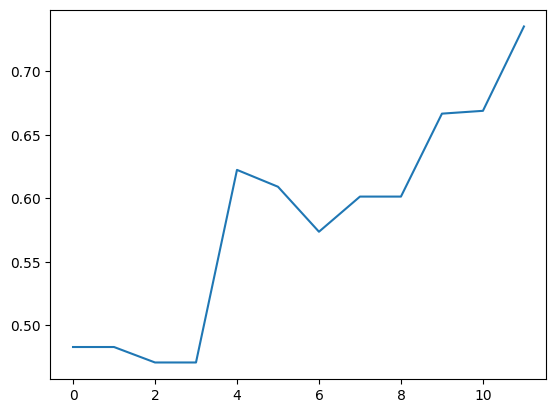

In [14]:
sns.lineplot([stage.score(X_test,y_test) for stage in clf])
clf.score(X_test,y_test)

6.39069423929099

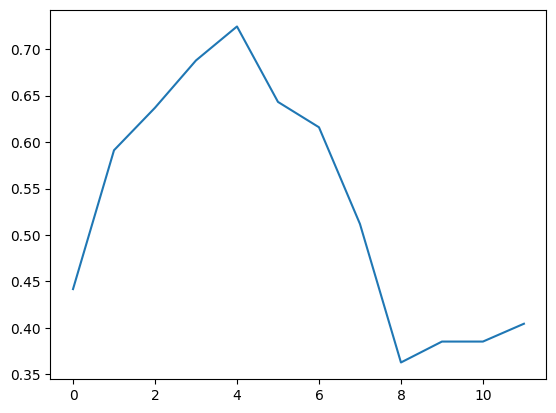

In [16]:
sns.lineplot([stage.score(X_train,y_train) for stage in clf])
clf.score(X_train,y_train)